In [6]:
# import libraries
import pandas as pd
from pytrends.request import TrendReq

In [5]:
pytrends = TrendReq(hl='it-IT', tz=15)

In [7]:
words_list = [
    ##"Vacanze",
    ##"Viaggi",
    ##"Gita",
    ##"Google Maps",
    ##"Traffico",
    ##"Traffico Milano",
    ##"Mare",
    ##"Montagna",
    ##"Lago Garda",
    #"Lago Como",
    #"Lago Iseo",
    #"Lago Lugano",
    #"Lago Maggiore",
    #"Lago Orta",
    #"Gardaland",
    #"Verona",
    #"Venezia",
    #"Svizzera",
    #"Austria",
    #"Trentino-South Tyrol",
    #"Liguria",
    #"Riviera Romagnola",
    #"Agrate Brianza",
    #"Provincia Monza Brianza",
    ##"Santo Ambrogio",
    ##"Halloween",
    ##"Natale",
    ##"Pasqua",
    ##"Ferragosto",
    ##"Capodanno",
    #"Fiera",
    #"Sagra",
    #"Manifestazione",
    #"Festa",
    #"Evento",
    #"Carnevale venezia",
    #"Eventi Monza",
    #"Feste Monza",
    ##"Partita milan",
    ##"Partita inter",
    ##"Partita juventus",
    ##"champions league",
    "Partita calcio",
    #"Formula 1",
    "Previsioni del tempo",
    "Pioggia",
    "Neve",
    "Meteo",
    "Meteo Agrate",
    "autostrada A4",
    #"Acqua e farina agrate",
    #"Gruppo ethos ristoranti",
    #"Ristoranti Agrate",
    "Pizza",
    #"Sushi",
    "Ristorante"
]

In [8]:
# get hourly data from google trends
for key_word in words_list:
    df = pytrends.get_historical_interest(keywords=[key_word],
         year_start=2021,month_start=6, day_start=1, hour_start=0,
         year_end=2022, month_end=12, day_end=1, hour_end=0,
         cat=0, geo='IT-25', gprop='', sleep=0)
    if "isPartial" in df.columns:
        df.drop(columns=['isPartial'], inplace=True)
    df.to_csv('data/' + key_word + '.csv')

The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The requ

In [ ]:
# preprocessing test

In [70]:
df = pd.read_csv('data/Vacanze.csv')
df

,date,Vacanze
0,2021-06-01 00:00:00,0
1,2021-06-01 01:00:00,0
2,2021-06-01 02:00:00,0
3,2021-06-01 03:00:00,0
4,2021-06-01 04:00:00,0
...,...,...
10691,2022-11-30 20:00:00,53
10692,2022-11-30 21:00:00,60
10693,2022-11-30 22:00:00,47
10694,2022-11-30 23:00:00,57


In [71]:
df["date"] = df["date"].apply(lambda x : pd.to_datetime(x).date())
df = df.groupby("date").mean()
df

,Vacanze
date,
2021-06-01,6.125000
2021-06-02,8.458333
2021-06-03,7.083333
2021-06-04,6.166667
2021-06-05,6.375000
...,...
2022-11-27,0.000000
2022-11-28,0.000000
2022-11-29,45.920000


<AxesSubplot:xlabel='date'>

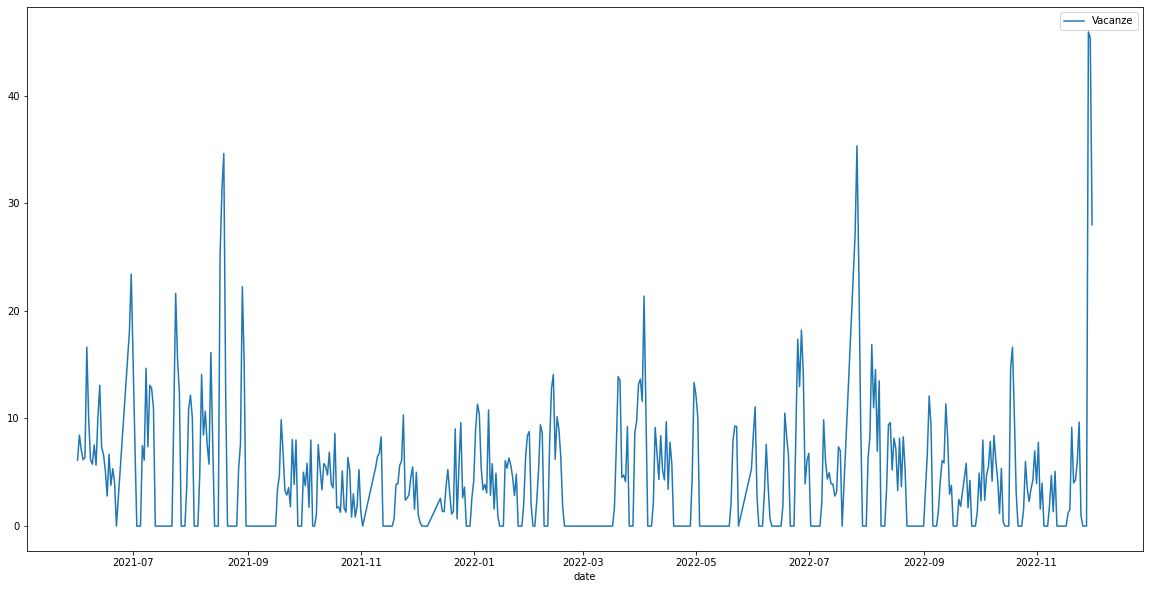

In [72]:
df.plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

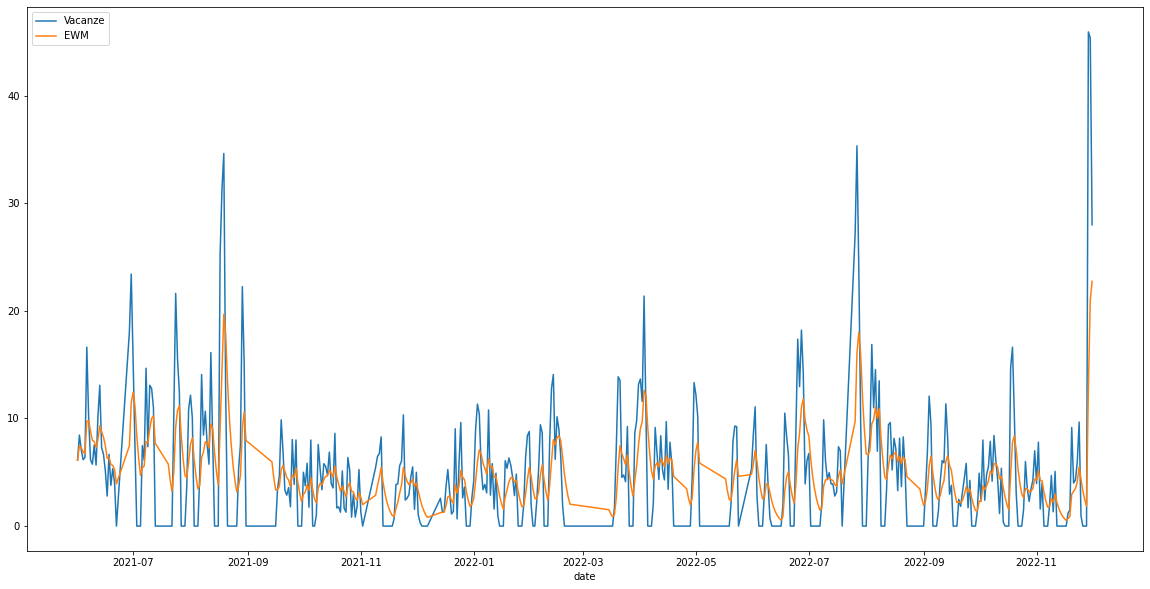

In [73]:
# exponential weighted moving average
df["EWM"] = df.ewm(span=7).mean()
df.plot(figsize=(20,10))

In [83]:
# preprocess all the data
for key_word in words_list:
    df = pd.read_csv('data/' +key_word + '.csv')
    print(key_word)
    print(df)
    df["date"] = df["date"].apply(lambda x : pd.to_datetime(x).date())
    df = df.groupby("date").mean()
    df[key_word] = df.ewm(span=7).mean()
    df.to_csv('data_preprocessed/' + key_word + '_processed.csv')

Vacanze
                      date  Vacanze
0      2021-06-01 00:00:00        0
1      2021-06-01 01:00:00        0
2      2021-06-01 02:00:00        0
3      2021-06-01 03:00:00        0
4      2021-06-01 04:00:00        0
...                    ...      ...
10691  2022-11-30 20:00:00       53
10692  2022-11-30 21:00:00       60
10693  2022-11-30 22:00:00       47
10694  2022-11-30 23:00:00       57
10695  2022-12-01 00:00:00       28

[10696 rows x 2 columns]
Viaggi
                      date  Viaggi
0      2021-06-01 00:00:00       0
1      2021-06-01 01:00:00       0
2      2021-06-01 02:00:00       0
3      2021-06-01 03:00:00       0
4      2021-06-01 04:00:00       0
...                    ...     ...
11705  2022-11-30 20:00:00      76
11706  2022-11-30 21:00:00      75
11707  2022-11-30 22:00:00      84
11708  2022-11-30 23:00:00      77
11709  2022-12-01 00:00:00      77

[11710 rows x 2 columns]
Gita
                     date  Gita
0     2021-06-01 00:00:00     0
1     2021-0

KeyError: 'date'